## Business case : To create a predictive model which will help the bank marketing team to know which customer will buy the product.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
dataa = pd.read_csv('bank-additional-full.csv',sep = ';')
dataa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [109]:
dataa.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
# BASIC CHECKS :
dataa.head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
dataa.tail(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
dataa.info()
# No NULL present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
dataa.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# INSIGHTS : 
* The dataset contains 41,188 rows and 21 columns.
* There are no missing values.
* The features are a mix of categorical and numerical data, requiring both encoding and scaling during preprocessing.


In [9]:
dataa['education'].value_counts()
# Datas are not in order.

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [10]:
dataa['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [11]:
dataa['day_of_week'].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [12]:
dataa.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
pd.set_option('display.max_columns',None)
dataa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# TASK 1
# EDA

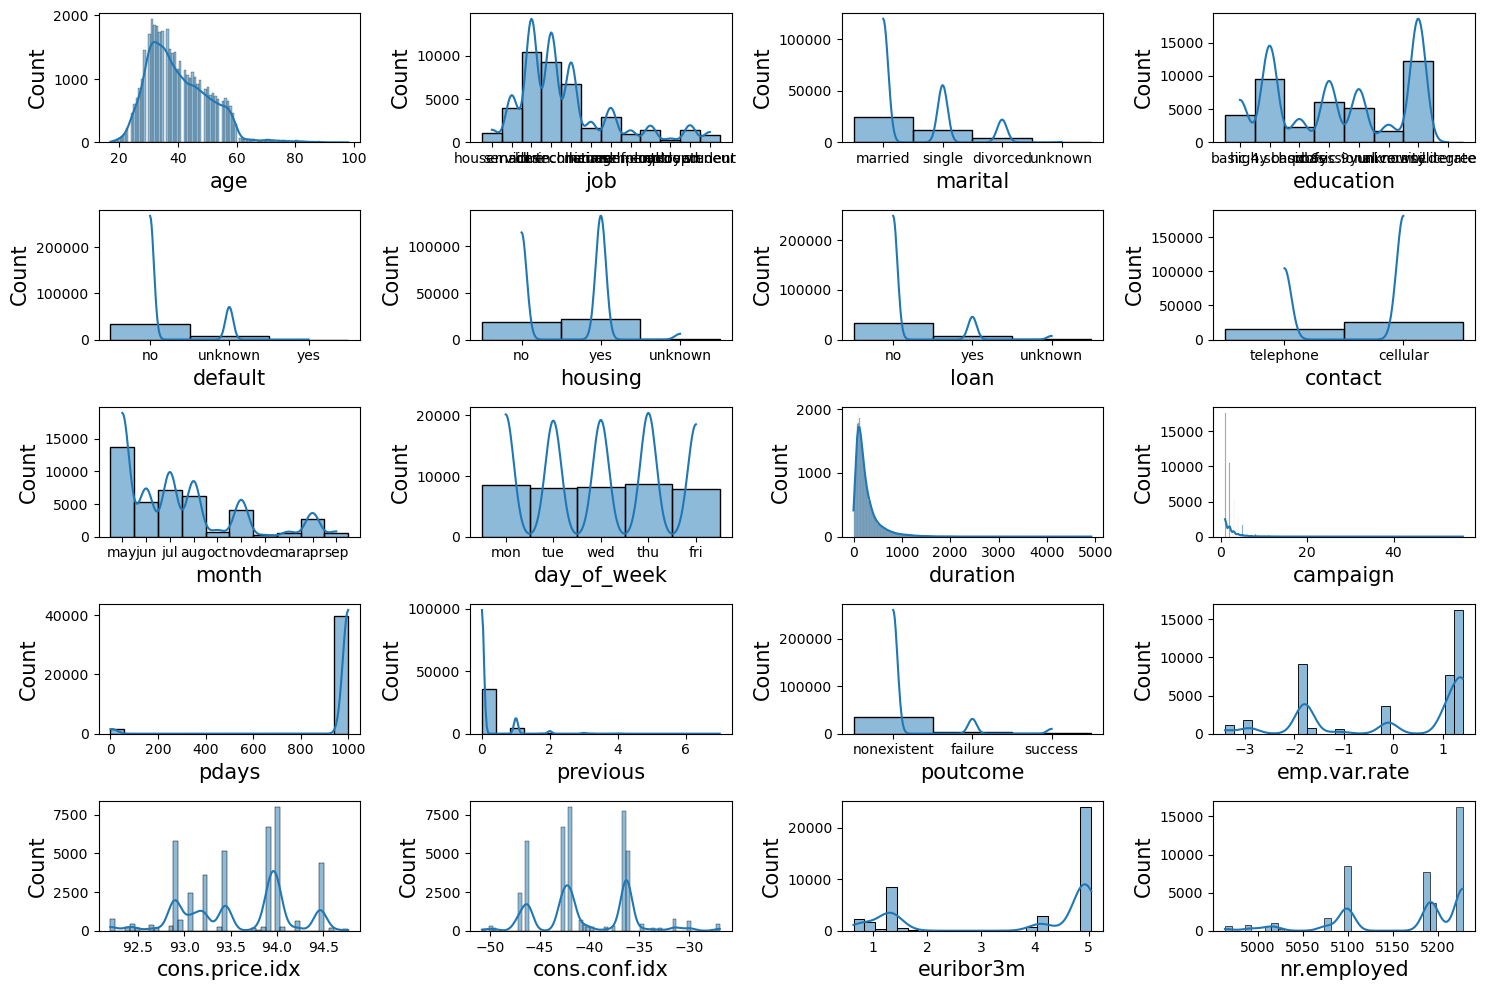

In [328]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber =1

for column in dataa:
    if plotnumber<= 20:
        ax = plt.subplot(5,4, plotnumber)
        sns.histplot(dataa[column],kde = True)
        plt.xlabel(column, fontsize= 15)
        plt.ylabel('Count', fontsize = 15)
    plotnumber+= 1
plt.tight_layout()

## Insights
* From the above chart we can see that , no feature is in normal distribution but most of all skewed one.
* Most numerical features (like `age`, `campaign`, `pdays`) are right-skewed, with long tails toward higher values.
* The `duration` feature is highly skewed.
* No feature shows a perfect bell-curve distribution; standard normalization might not be ideal.
* Several binary features (like `default`, `housing`, `loan`) have dominant values, indicating class imbalance.
* Features like `previous` and `pdays` have many zero entries, suggesting either uncontacted clients or missing campaigns.


In [16]:
dataa.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
dataa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
dataa.shape

(41188, 21)

<Axes: xlabel='age', ylabel='poutcome'>

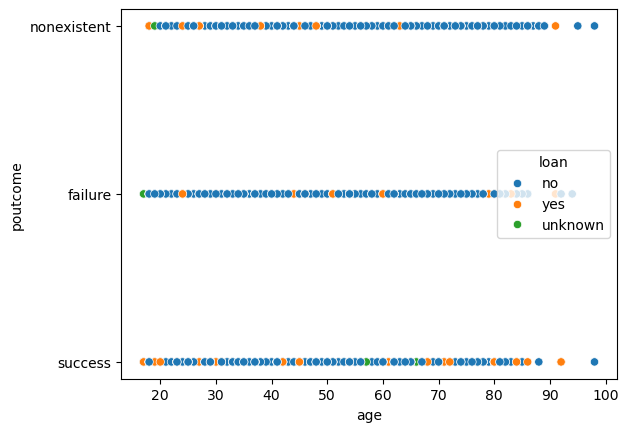

In [23]:
# Bi- variate :

sns.scatterplot(data = dataa , x = 'age', y = 'poutcome',hue = 'loan')

In [31]:
dataa.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='month', ylabel='age'>

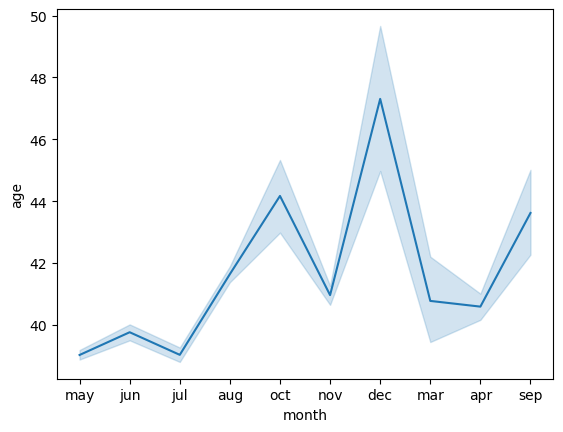

In [32]:
sns.lineplot(data = dataa, x = 'month',y = 'age')

In [33]:
dataa.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='job'>

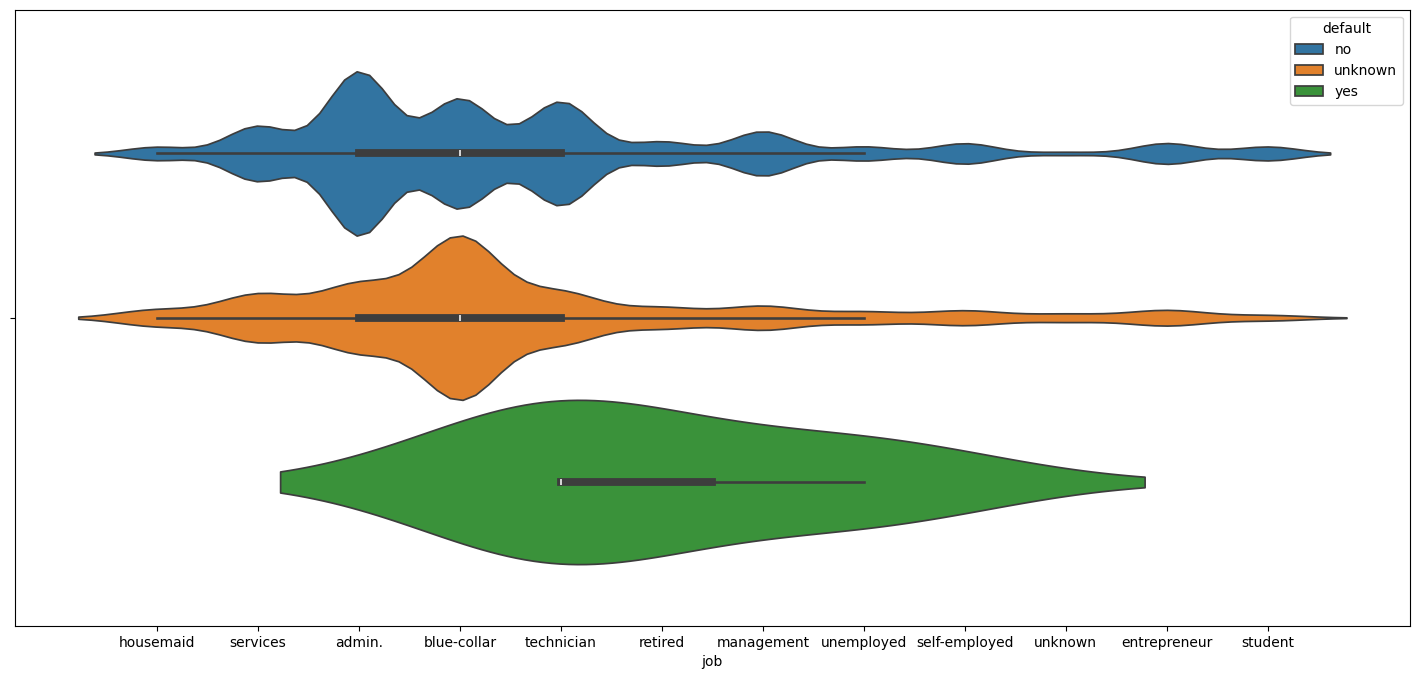

In [34]:
plt.figure(figsize=(18,8), facecolor='white')
sns.violinplot(data = dataa , x = 'job',hue = 'default')

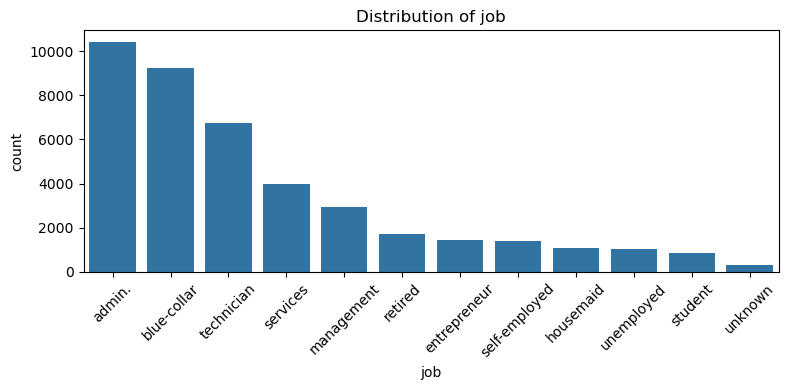

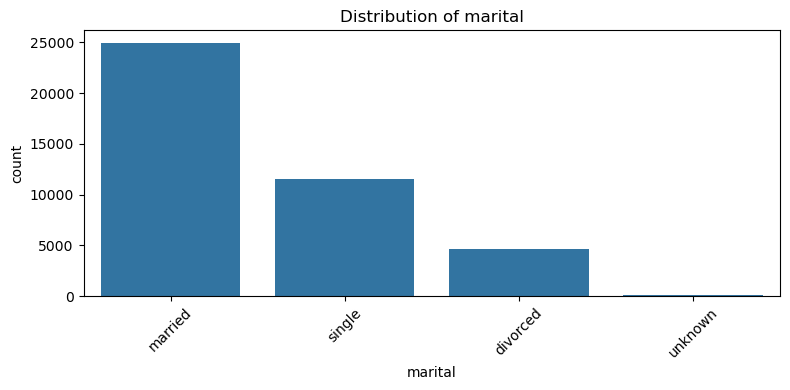

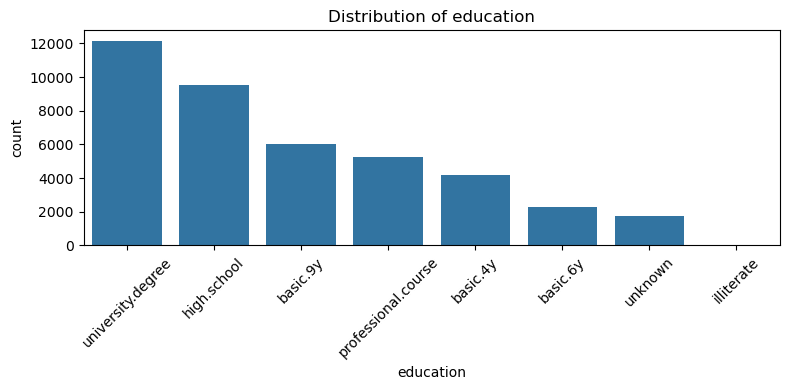

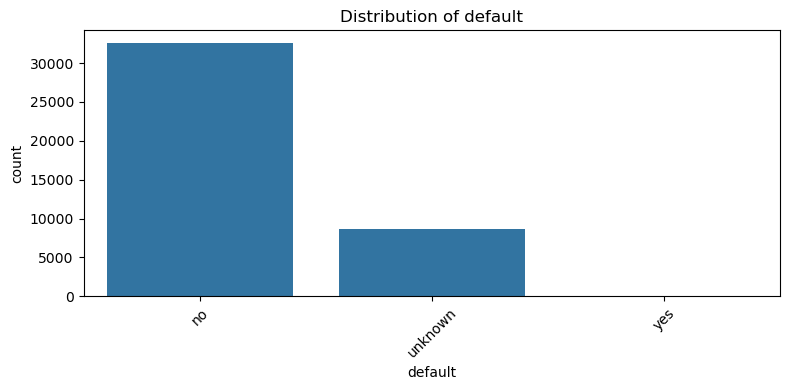

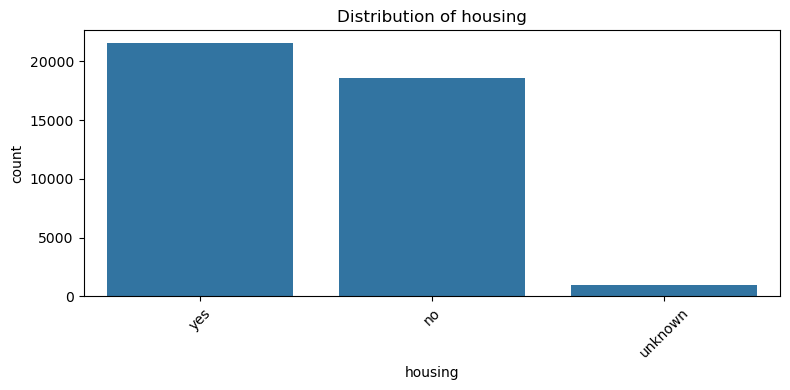

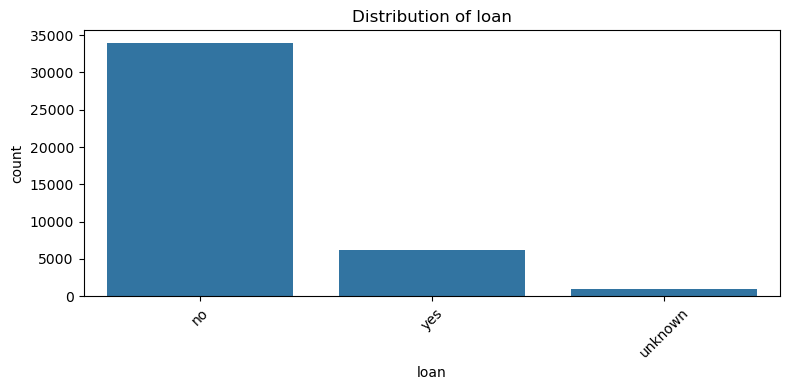

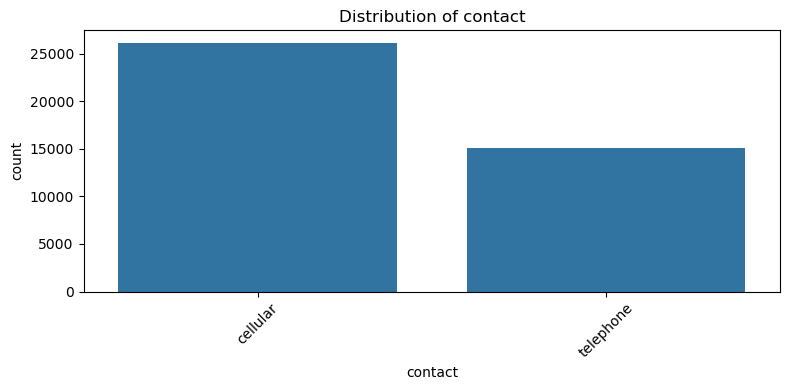

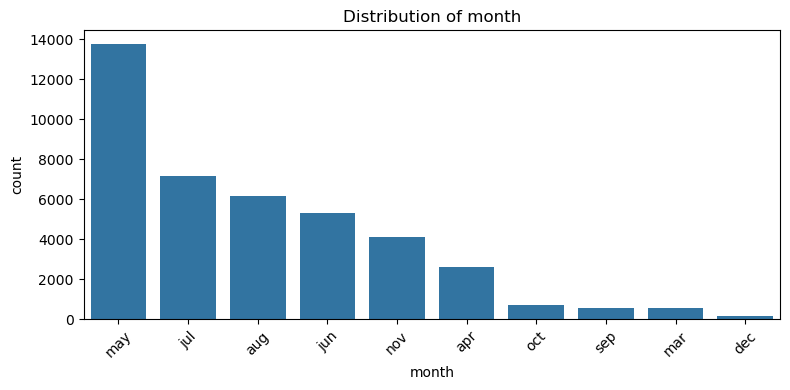

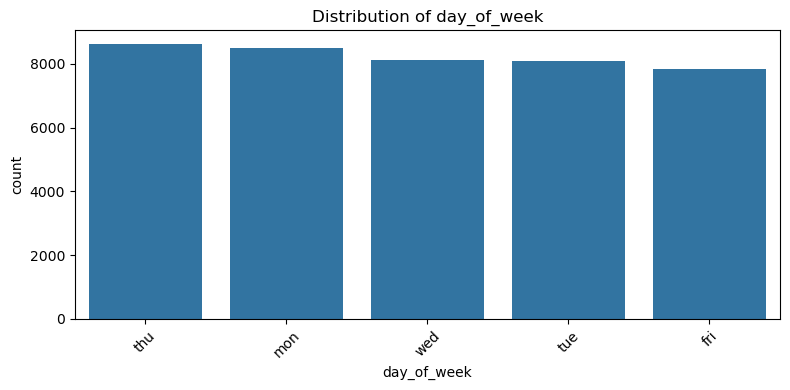

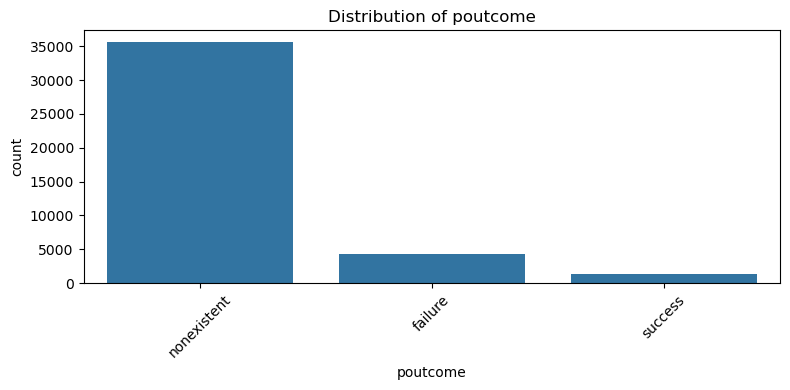

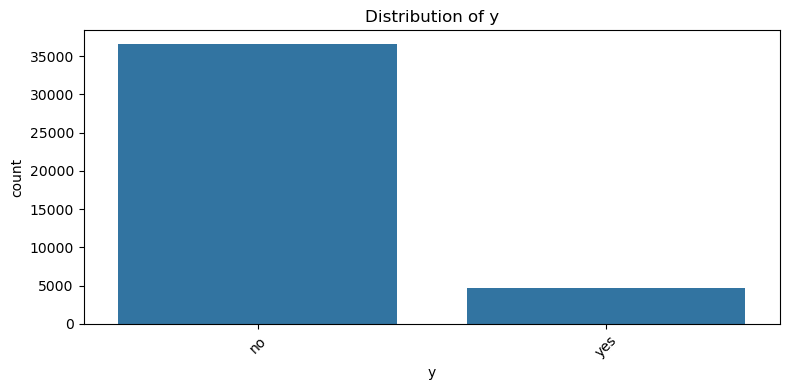

In [35]:
categorical_cols = dataa.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataa, x=col, order=dataa[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# INSIGHTS :
* Most customers have jobs listed as `admin.`, `blue-collar`, or `technician`.
* `Unknown` values are present in several categories (like job and education), which may impact model interpretability.
* The `education` level is dominated by `secondary`, followed by `tertiary`, showing that the bank serves an educated client base.
* Very few customers have a credit default, indicating a generally financially responsible group.
  
* Most campaign calls were made in **May**, followed by **August** and **July** — peak months for activity.
* Very few contacts were made in **December**, likely due to holiday season or end-of-year slowdowns.
* Most successful calls (with subscription) happen during **Mon–Thu**; Fridays see slightly lower success.
* `Duration` is a strong predictor — longer calls often result in conversions.
* Strategic contact timing (early week, non-holiday months) could boost campaign performance.


* A majority of the clients have housing loans (`yes`), followed by a smaller group without loans.
* Most customers do not have personal loans, but a non-negligible fraction do.


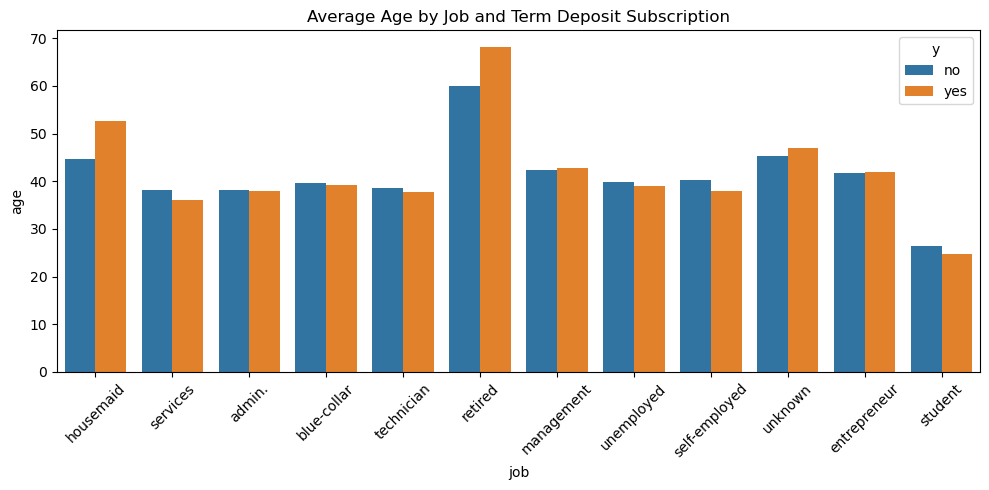

In [37]:
## Average age for each job category
plt.figure(figsize=(10, 5))
sns.barplot(data=dataa, x='job', y='age', hue='y', ci=None)
plt.xticks(rotation=45)
plt.title('Average Age by Job and Term Deposit Subscription')
plt.tight_layout()
plt.show()

## Insights: 

- `Retired` customers who subscribed to term deposits have the highest average age, showing they are more inclined towards long-term savings.
- Among `housemaids`, subscribers are significantly older than non-subscribers, indicating older individuals in this group are more investment-prone.
- In professions like `admin`., `technician`, and `management`, there is minimal age difference between subscribers and non-subscribers, suggesting age is not a key factor in those categories.
- `Students` have the lowest average age and low subscription rates, due to limited income.
- Overall, age appears to influence term deposit decisions most strongly in `retired` and `housemaid` groups, where the difference in age between subscribers and non-subscribers is more evident.


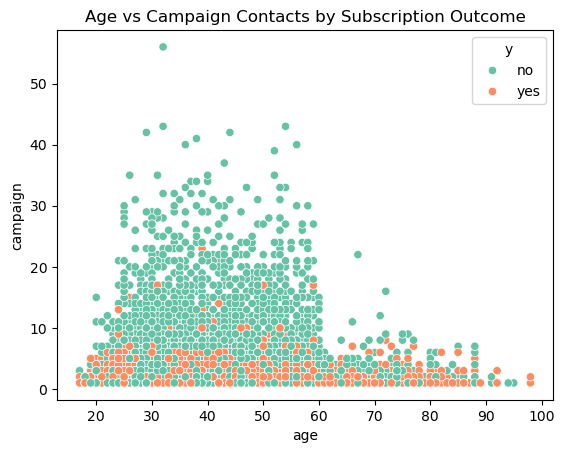

In [39]:
sns.scatterplot(data=dataa, x='age', y='campaign', hue='y', palette='Set2')
plt.title('Age vs Campaign Contacts by Subscription Outcome')
plt.show()

## Insights: 

- Most `subscriptions` (`yes`) occurred with fewer than 5 campaign `contacts`, indicating high conversion rates in early contact attempts.
- As the **number of campaign contacts increases**, the likelihood of subscription **decreases**, especially beyond 10 contacts.
- Subscriptions (`yes`) are distributed across all age groups, but more concentrated in the **30 to 60 age range**.
- A high density of non-subscriptions (`no`) is visible across all ages and campaign counts


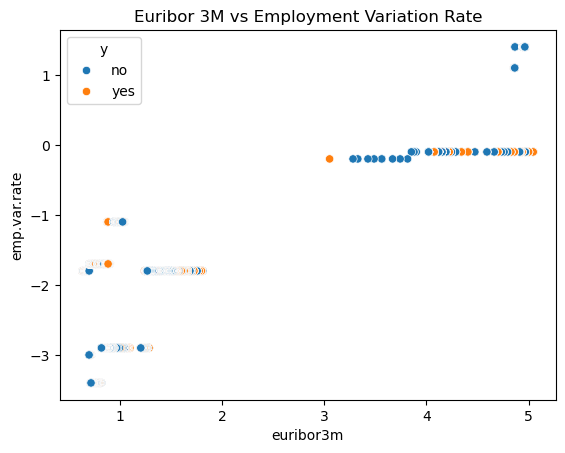

In [41]:
sns.scatterplot(data=dataa, x='euribor3m', y='emp.var.rate', hue='y')
plt.title('Euribor 3M vs Employment Variation Rate')
plt.show()

## Insights: 

- A majority of `subscriptions` (yes) occurred when the `euribor3m` rate was low (close to or below 1.5), suggesting clients were more likely to invest when interest rates were lower.
- Most `subscriptions` happened when the `employment variation rate` was negative, particularly around `-1.8 to -2.0`, reflecting economic downturns may influence saving behavior.
- When `euribor3m` values were high (above 3.0), the plot shows mostly `non-subscriptions`, indicating high interest rates discouraged term deposit signups.



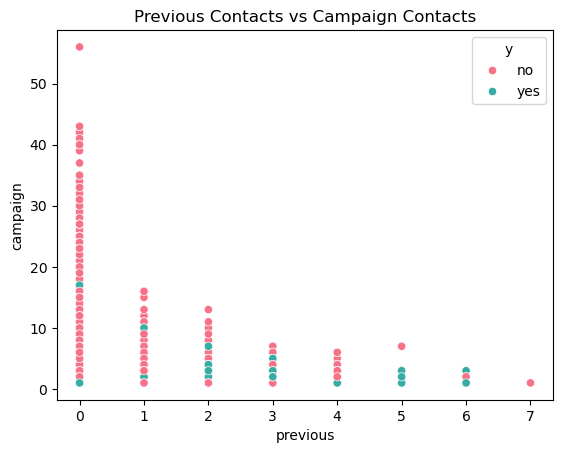

In [43]:
sns.scatterplot(data=dataa, x='previous', y='campaign', hue='y', palette='husl')
plt.title('Previous Contacts vs Campaign Contacts')
plt.show()

## Insights: 

- Most clients with `0` previous contacts required a higher number of current campaign calls, yet showed a low subscription rate.
- Clients with `1` or `2` previous contacts had more `yes` (subscription) responses, indicating that earlier successful engagements may positively influence campaign outcomes.
- As the number of `previous` contacts increases, the `campaign` calls required tend to decrease, suggesting that previously contacted clients need fewer follow-ups.
- A dense cluster of `no` responses is seen at high `campaign` counts with `0` previous contacts, highlighting the inefficiency of targeting completely new clients multiple times.
- Overall, clients with a history of previous contact are more likely to subscribe with fewer campaign attempts, making them a valuable target group for future marketing efforts.


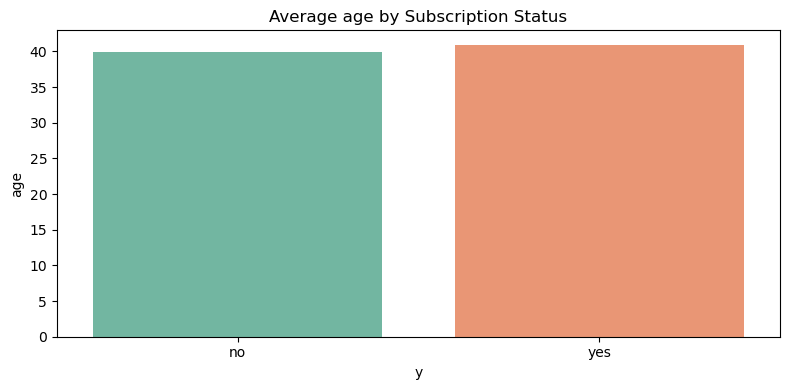

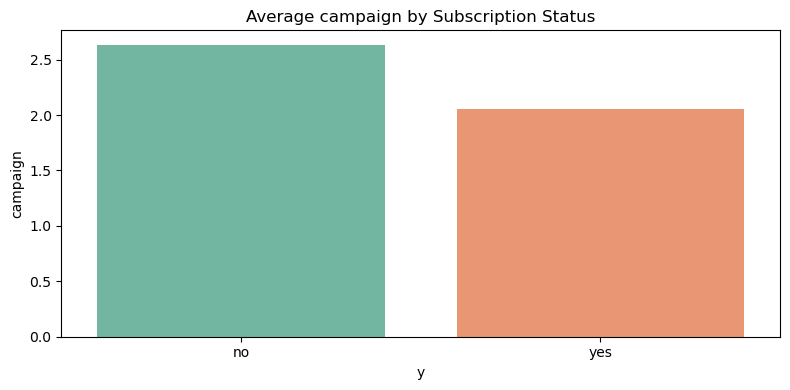

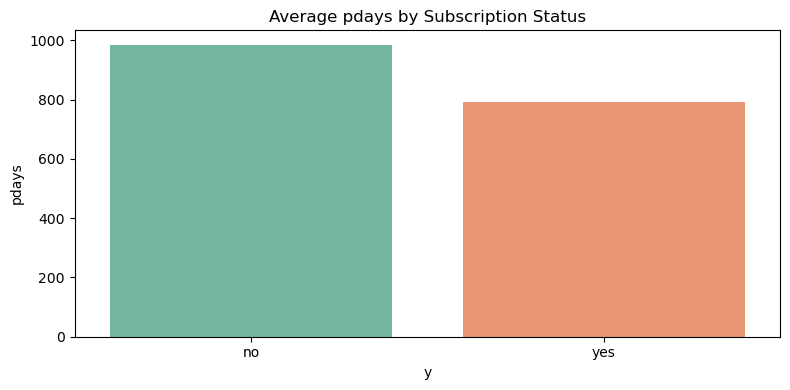

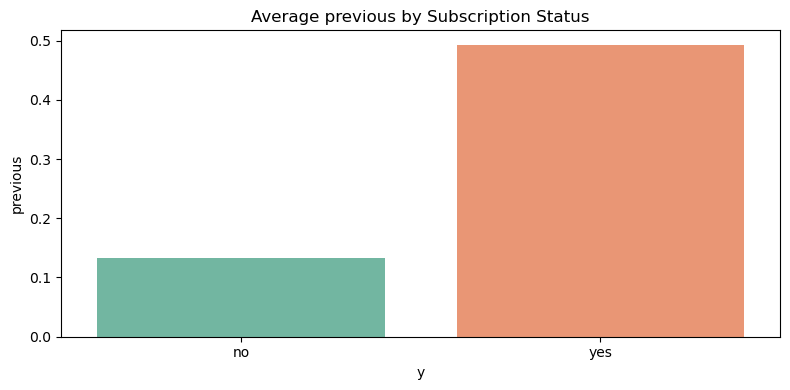

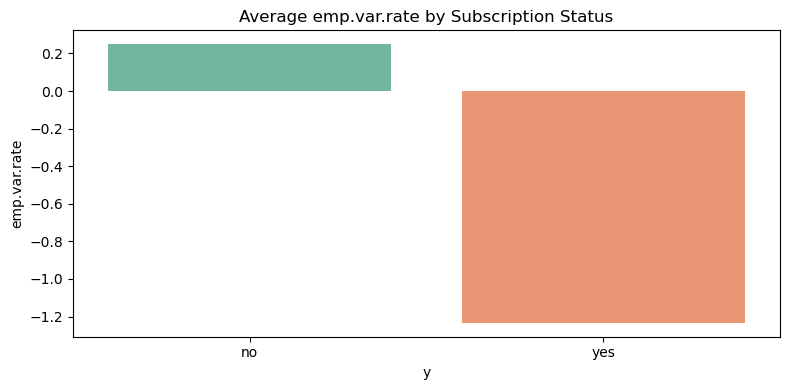

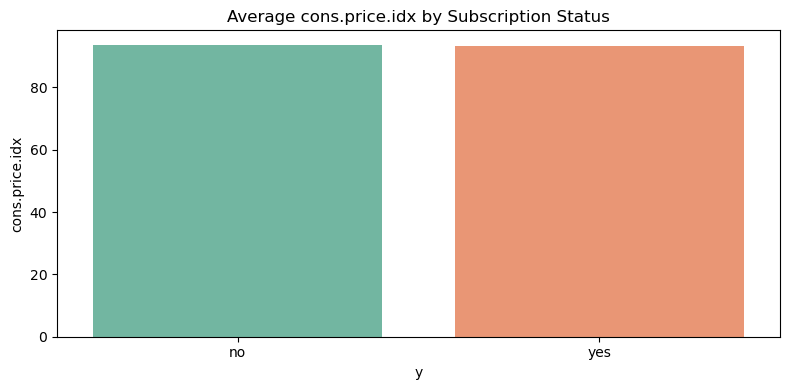

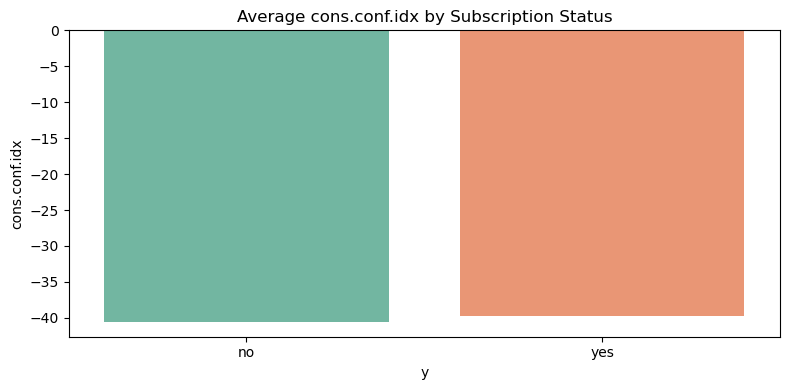

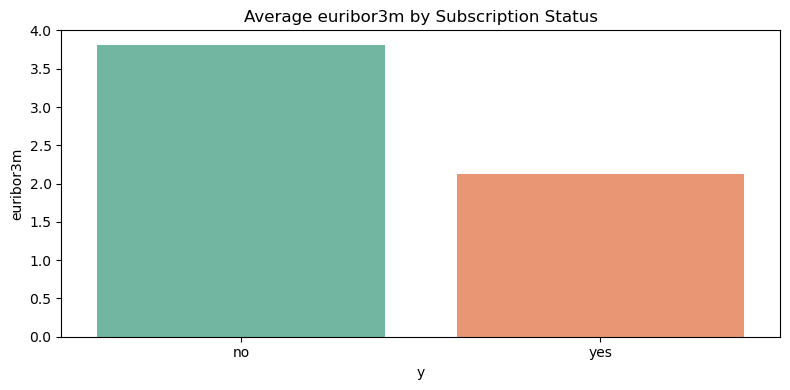

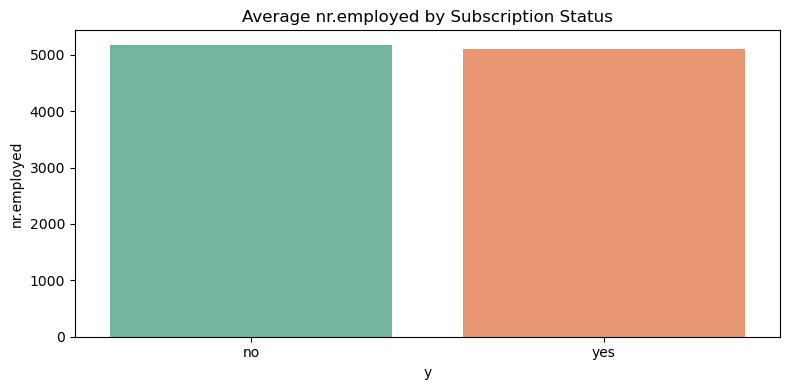

In [45]:
# Bi-variate :
# NUMERICAL FEATURES VS TARGET COLUMN(y)
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 
                  'emp.var.rate', 'cons.price.idx', 
                  'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=dataa, x='y', y=col, ci=None,palette = 'Set2')
    plt.title(f'Average {col} by Subscription Status')
    plt.tight_layout()
    plt.show()

## Insights: 

- The `average age` is slightly higher for subscribed (`yes`) clients, indicating that older individuals tend to opt for term deposits more often.
- Subscribed clients had a lower `average number of campaign contacts`, suggesting that effective communication happens in fewer attempts.
- A significantly lower `average pdays` (days since last contact) among subscribers implies that recent follow-ups are more likely to result in a positive outcome.
- The `average previous` contacts are slightly higher for those who subscribed, supporting the idea that previous engagement improves campaign success.
- Subscribed users also show a slightly higher `emp.var.rate` and lower `cons.conf.idx`.

# Multi-variate Analysis

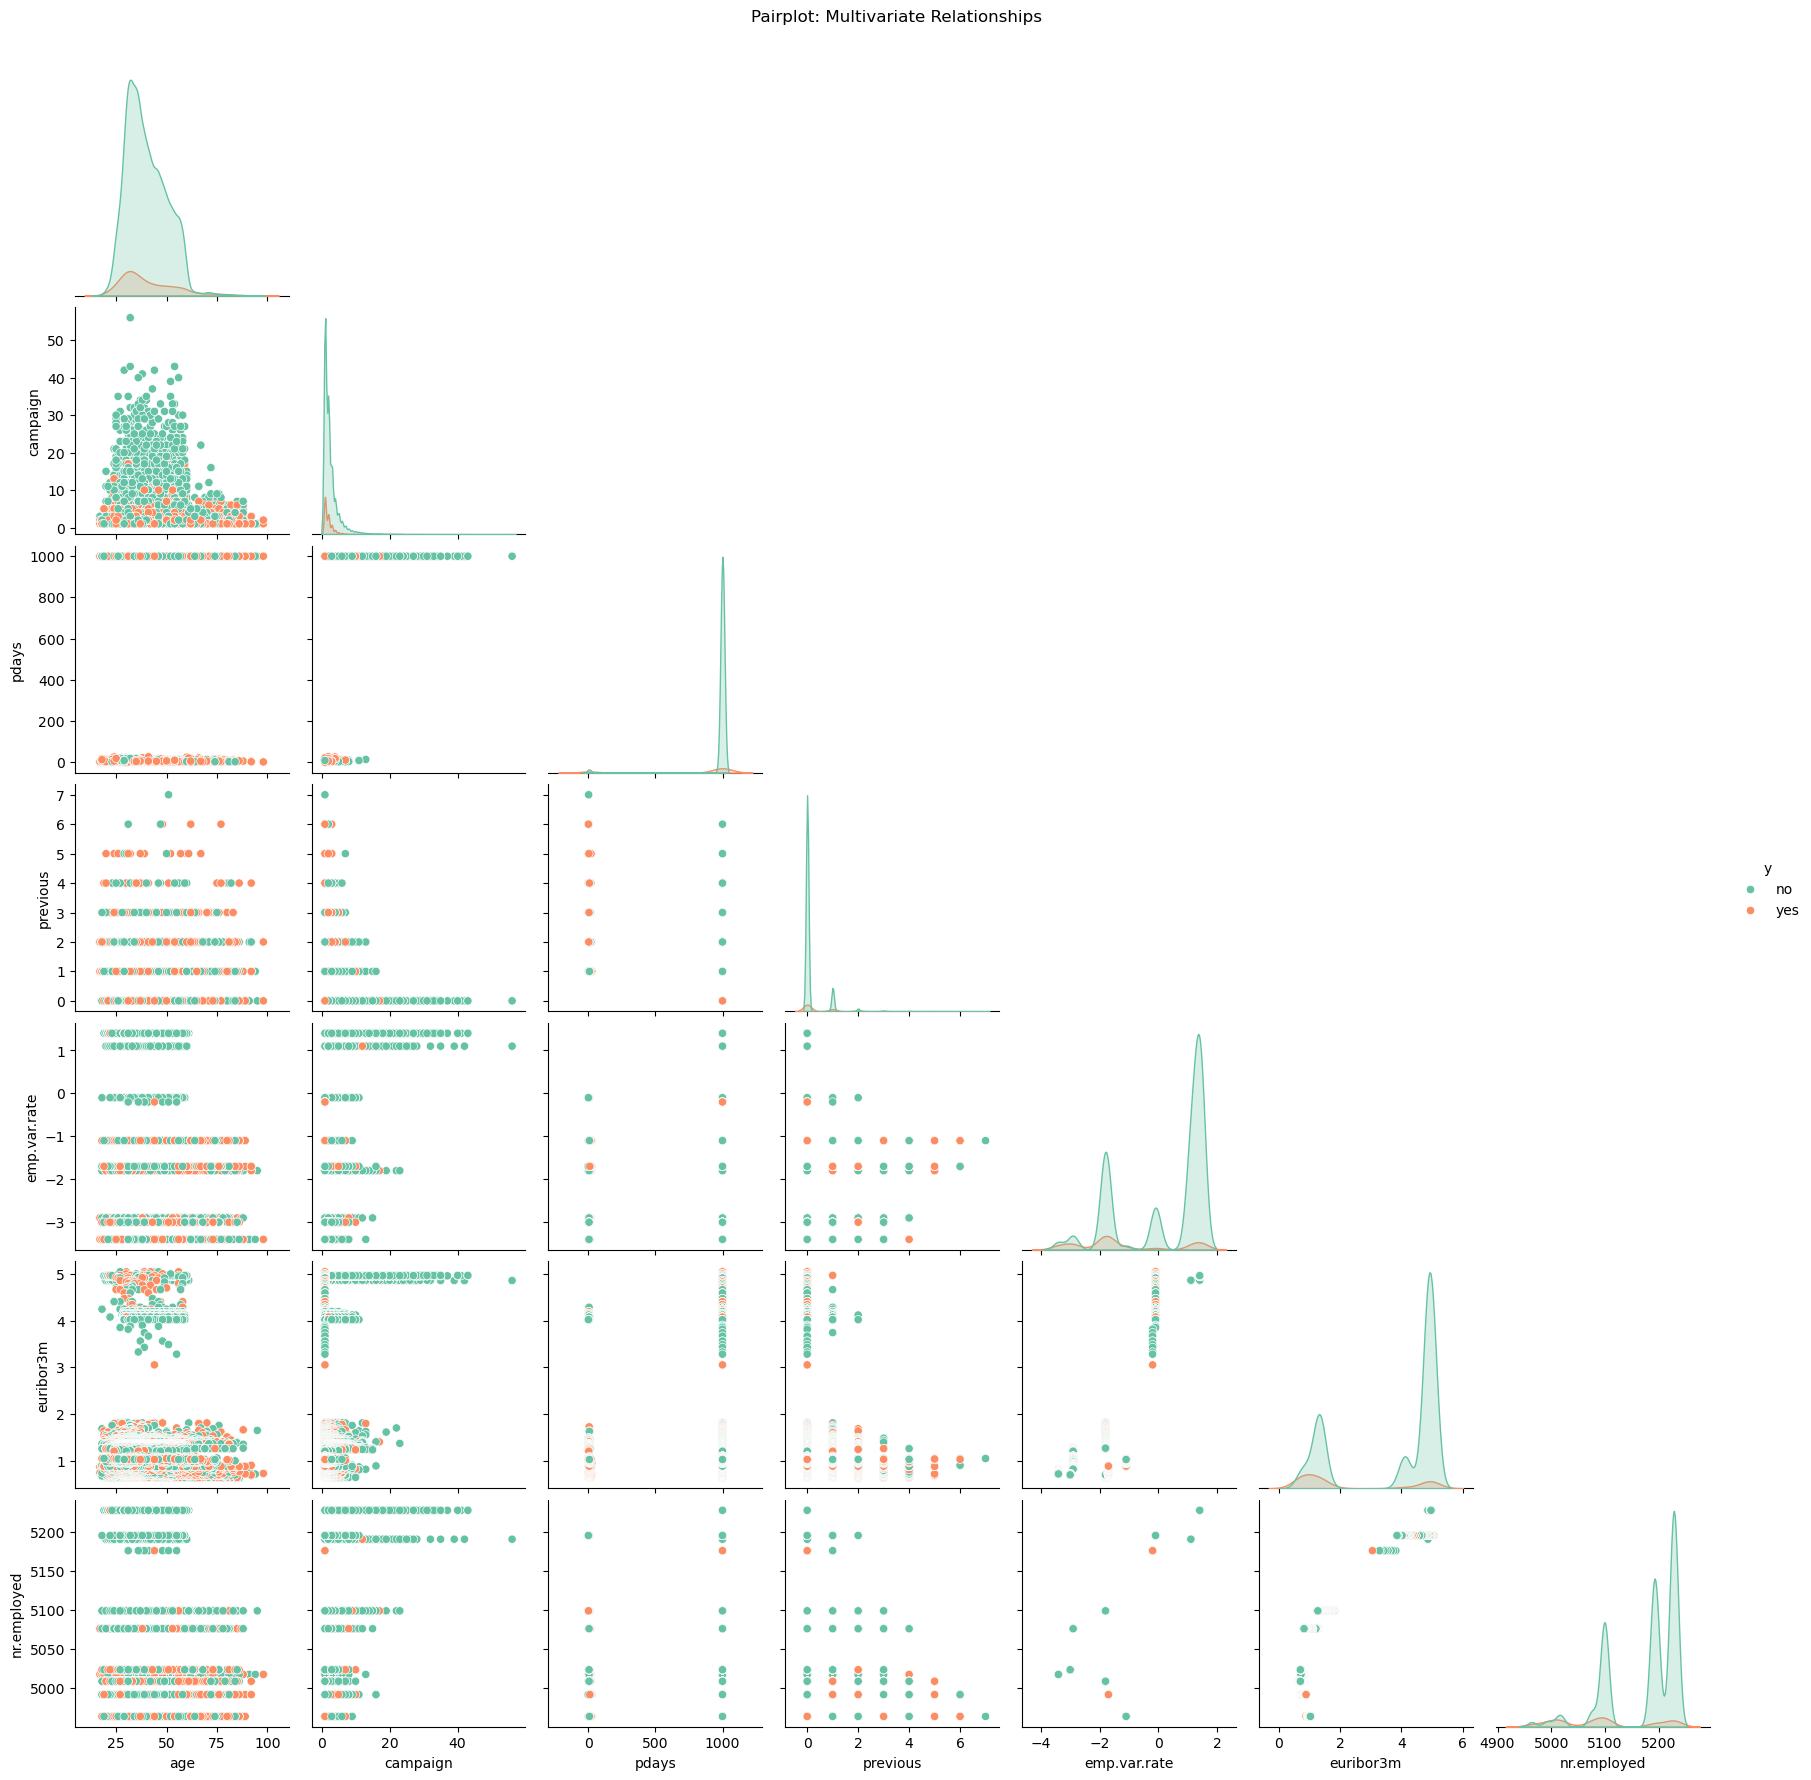

In [48]:
# Choosing subset of important features
selected_cols = ['age', 'campaign', 'pdays', 'previous', 
                 'emp.var.rate', 'euribor3m', 'nr.employed', 'y']
sns.pairplot(dataa[selected_cols], hue='y', palette='Set2', corner=True)
plt.suptitle('Pairplot: Multivariate Relationships', y=1.02)
plt.show()

## Insights: 

- Most `yes` (subscriptions) occur when the `campaign` contacts are low (≤5), reaffirming that early interactions are more effective in converting leads.
- High `pdays` (days since last contact) are mostly associated with `no` responses, while lower `pdays` tend to cluster around `yes`, suggesting timely follow-ups increase success.
- Subscribed clients tend to have slightly more `previous` contacts, highlighting the positive impact of prior engagement on campaign effectiveness.
- A strong cluster of `yes` outcomes occurs when both `emp.var.rate` and `euribor3m` are low, indicating economic uncertainty encourages clients to secure savings via term deposits.
- Clients with `nr.employed` (number of employees) values around 5000–5100 show more `yes` responses, suggesting that a lower employment rate in the economy might push clients to make conservative financial decisions.


# DATA PREPROCESSING :

In [203]:
data1 = dataa.copy()
data1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [205]:
data1.isnull().sum()
# no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [207]:
# CHECKING FOR DUPLICATES
data1.duplicated().sum()

12

In [209]:
data1.drop_duplicates(inplace =True)

In [211]:
data1.duplicated().sum()

0

In [213]:
# IDENTIFYING COLUMNS WITH "unknown"
for col in data1.columns:
    if data1[col].dtype == 'object':
        print(f"{col}: {data1[col].value_counts().get('unknown', 0)} unknowns")

job: 330 unknowns
marital: 80 unknowns
education: 1730 unknowns
default: 8596 unknowns
housing: 990 unknowns
loan: 990 unknowns
contact: 0 unknowns
month: 0 unknowns
day_of_week: 0 unknowns
poutcome: 0 unknowns
y: 0 unknowns


In [215]:
data1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [217]:
data1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [219]:
data1.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [221]:
# Replacing with mode of each column
for col in ['job', 'education', 'marital', 'default', 'housing', 'loan']:
    mode = data1[col].mode()[0]
    data1[col] = data1[col].replace('unknown', mode)

# OUTLIERS :

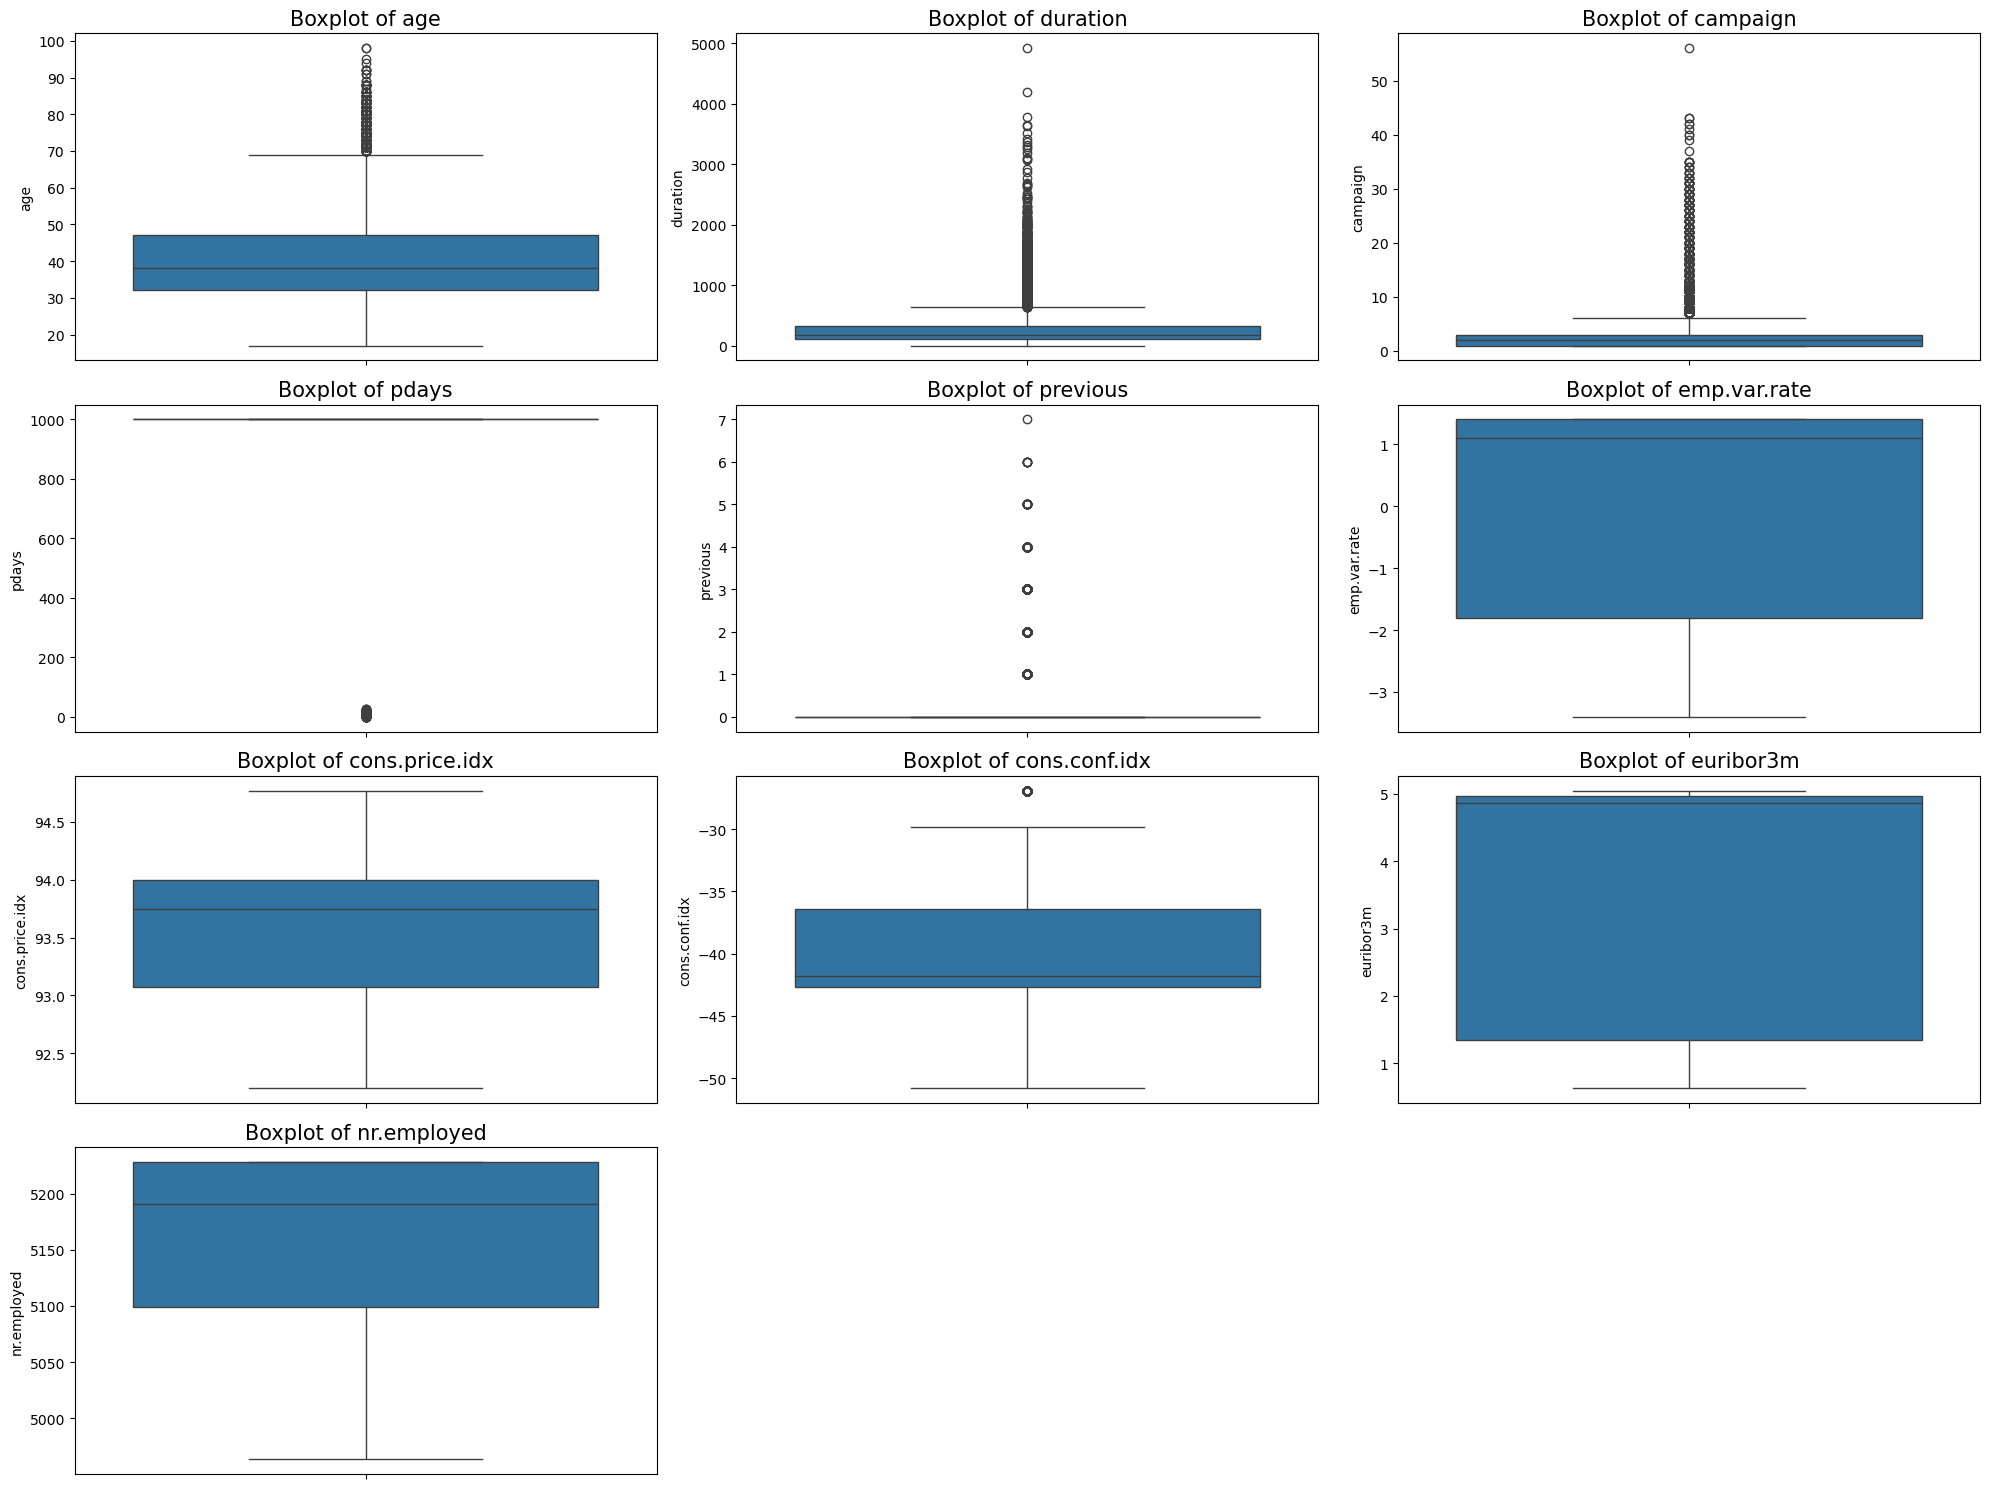

In [170]:
numerical_cols = data1.select_dtypes(include = ['int64','float64']).columns
plt.figure(figsize = (20,15))
plotnumber = 1
for column in numerical_cols:
    if plotnumber<=len(numerical_cols):
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y = data1[column],ax = ax)
        plt.title(f'Boxplot of {column}',fontsize = 15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [171]:
# since every columns was skewed :
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for col in numerical_cols:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data1 = data1[(data1[col] >= lower_bound) & (data1[col] <= upper_bound)]

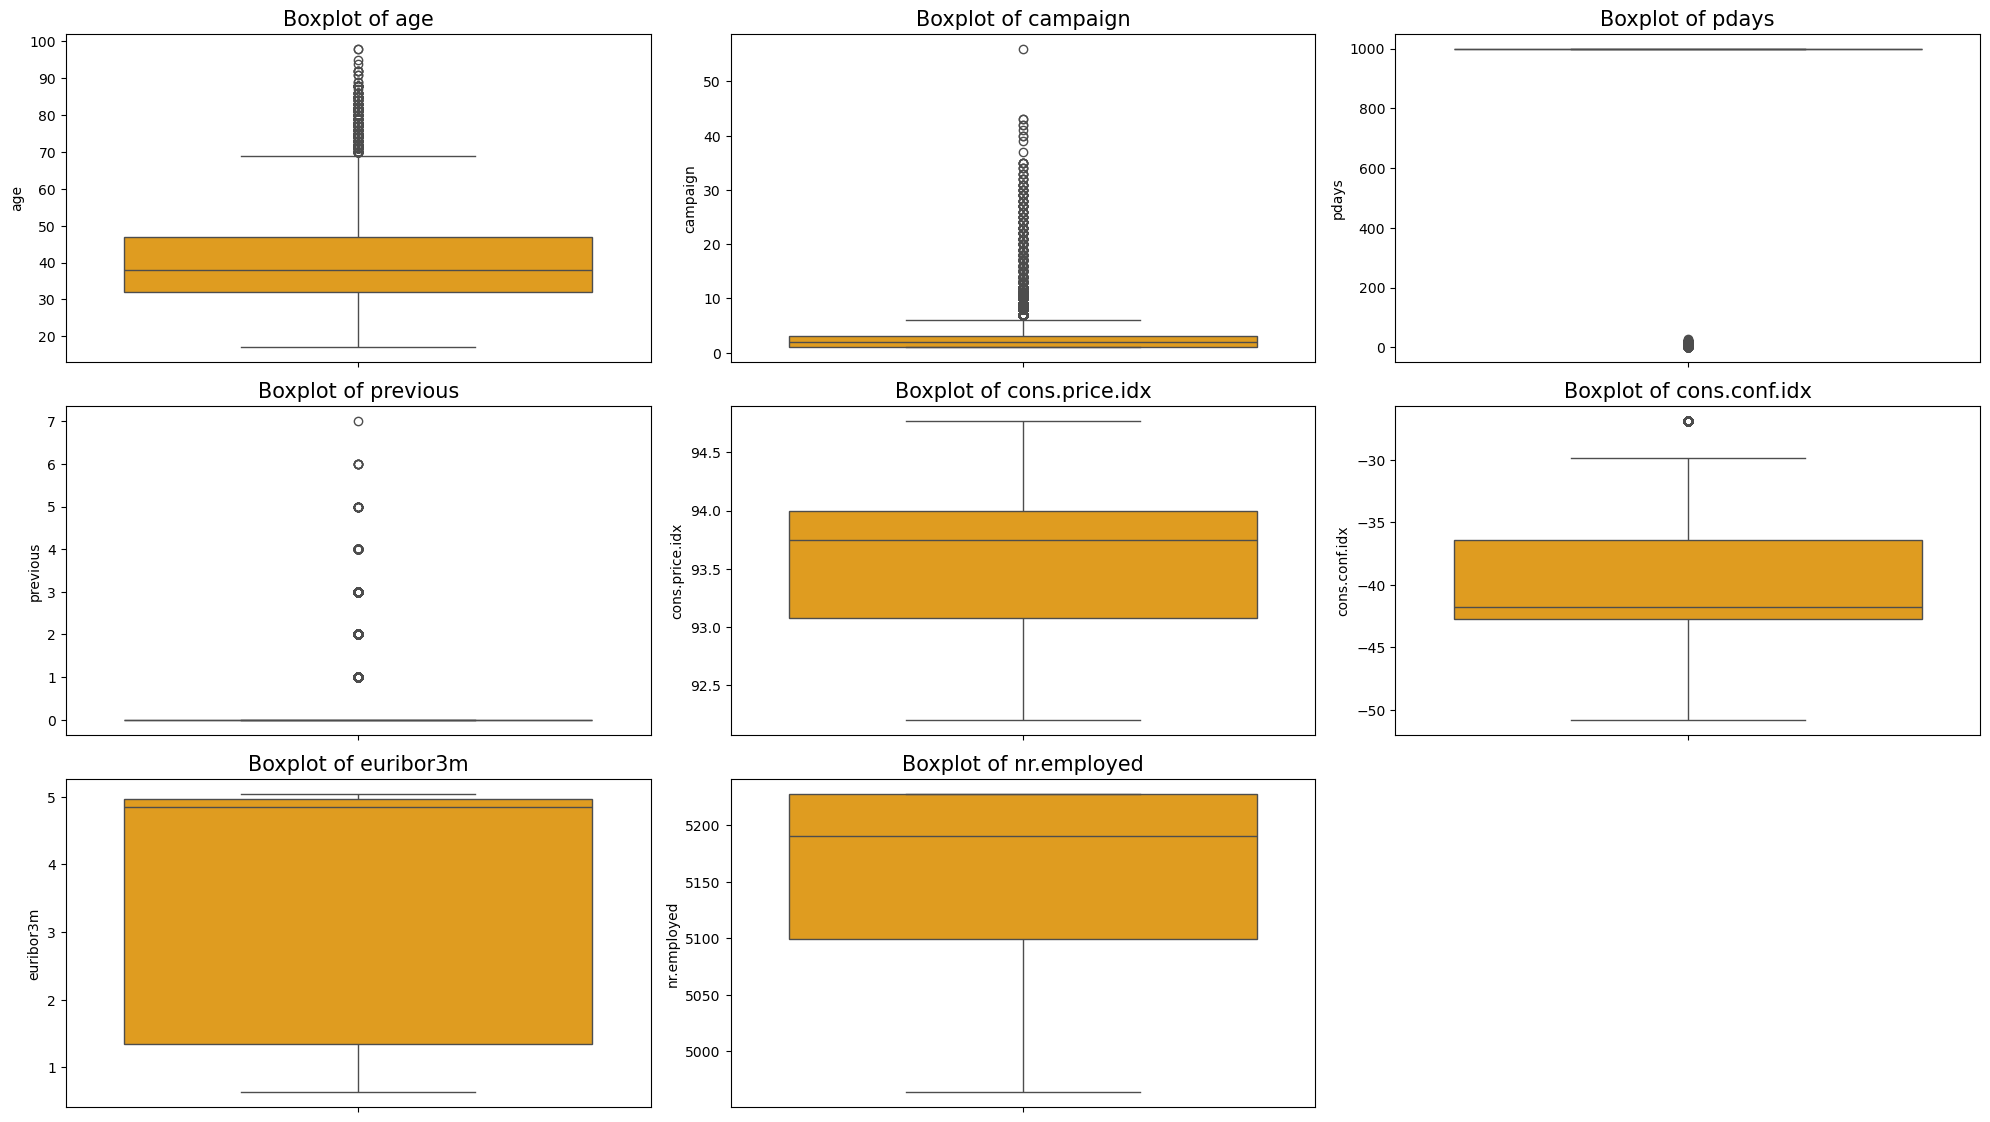

In [324]:
# after IQR

numerical_cols = data1.select_dtypes(include = ['int64','float64']).columns
plt.figure(figsize = (20,15))
plotnumber = 1
for column in numerical_cols:
    if plotnumber<=len(numerical_cols):
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(y = data1[column],ax = ax,color = 'orange')
        plt.title(f'Boxplot of {column}',fontsize = 15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [223]:
data1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [225]:
cor = data1.corr(numeric_only = True)
cor

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [227]:
# TO reemove the highly correlated feauters:
cor[cor>0.9] #Thumb rule

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.972244,0.906949
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972244,NaN,NaN,1.000000,0.945146
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906949,NaN,NaN,0.945146,1.000000


In [229]:
# dropping 'emp.var.rate'
data1.drop(['emp.var.rate'],axis = 1 , inplace = True)

In [231]:
# Multi-collinearity :

cor2 = data1[data1.columns[:-1]].corr(numeric_only = True)
cor2

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.203197,-0.050929,-0.454571,-0.501411
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.521945,0.100679,0.945146,1.000000


In [233]:
data1.drop(['duration'],axis = 1 , inplace = True)

In [235]:
cor2[cor2>0.8] #Thumb rule

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
cons.price.idx,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.945146
nr.employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945146,1.000000


# INSIGHTS :
* The `duration` feature has the highest correlation with the target variable `y`.
* Other numerical features show weak correlation with `y`, indicating categorical features or interactions are more useful.
* Inter-feature correlation is low, which is ideal for models like Logistic Regression that assume feature independence.
* Strong predictors from tree-based feature importance include `duration`, `month`, and `contact`.
* Redundant or low-importance variables (like `default`) could be dropped for simpler models.


# Data Encoding

In [239]:
from sklearn.preprocessing import LabelEncoder

In [241]:
X = data1.drop('y', axis=1)
y = data1['y']

In [243]:
data1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,94.767,-50.8,1.028,4963.6,no


In [245]:
#One Hot encoding for X
X_encoded = pd.get_dummies(X, drop_first=False)

In [247]:
# Label encoding for Y
le = LabelEncoder()
y_encoded = le.fit_transform(y) 

In [249]:
# Y into Dataframe
y_encoded_df = pd.DataFrame({'Y': y_encoded})

In [192]:
#data3 = data2.copy()
data3 = data1.copy()
data3.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27685,51,blue-collar,married,basic.4y,no,yes,yes,telephone,dec,mon,170,1,999,0,nonexistent,-0.2,92.756,-45.9,3.488,5176.3,no
27686,39,technician,married,professional.course,no,yes,no,telephone,dec,tue,183,1,999,0,nonexistent,-0.2,92.756,-45.9,3.428,5176.3,no
27687,36,blue-collar,married,high.school,no,yes,no,cellular,dec,thu,234,1,999,0,nonexistent,-0.2,92.756,-45.9,3.329,5176.3,no
27688,55,unemployed,divorced,professional.course,no,no,no,telephone,dec,fri,136,1,999,0,nonexistent,-0.2,92.756,-45.9,3.282,5176.3,no
27689,44,blue-collar,married,basic.4y,no,yes,yes,telephone,dec,mon,119,1,999,0,nonexistent,-0.2,92.756,-45.9,3.053,5176.3,yes


In [251]:
# Applying label encoding to convert obj to int type
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# TASK 2
# Model Building

In [254]:
X_encoded.shape

(41176, 55)

In [150]:
data3['age'].value_counts()

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [256]:
X_encoded.isna().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced                 0
marital_married                  0
marital_single                   0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

In [258]:
X_encoded.tail()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,73,1,999,0,94.767,-50.8,1.028,4963.6,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
41184,46,1,999,0,94.767,-50.8,1.028,4963.6,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
41185,56,2,999,0,94.767,-50.8,1.028,4963.6,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
41186,44,1,999,0,94.767,-50.8,1.028,4963.6,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
41187,74,3,999,1,94.767,-50.8,1.028,4963.6,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False


In [260]:
#X.shape
X_encoded.shape

(41176, 55)

In [262]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [291]:
# Train-Test  split :

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.3, stratify=y, random_state=42
#)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)



In [293]:
#SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [295]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 25576, 1: 3247})
After SMOTE: Counter({0: 25576, 1: 25576})


In [297]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

In [298]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10654   307]
 [  990   402]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10961
           1       0.57      0.29      0.38      1392

    accuracy                           0.90     12353
   macro avg       0.74      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353



### Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
rf_preds = rf_model.predict(X_test)

In [303]:
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Results
Accuracy: 0.8865862543511698
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10961
           1       0.50      0.34      0.40      1392

    accuracy                           0.89     12353
   macro avg       0.71      0.65      0.67     12353
weighted avg       0.87      0.89      0.88     12353



In [317]:
# Hyper-parameter tuning :
from sklearn.model_selection import GridSearchCV

n_estimators = [100,150,200,250,300]
max_features = ['auto','sqrt','log2']
max_depth = [10,20,30]
max_depth.append(None)
min_samples_split = [5,10]
min_samples_leaf = [2,4]

# Dictionary for hyperparameters

random_grid = {'n_estimators' : n_estimators,'max_features' : max_features,
              'max_depth': max_depth, 'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

rf_model = RandomForestClassifier(random_state = 42)   # Loading the model

rf_cv = GridSearchCV(estimator = rf_model, scoring = 'f1', param_grid = random_grid, cv = 3, verbose = 2, n_jobs = -1)  
# Here n_jobs is to take the support of hardware help to perform.

rf_cv.fit(X_train,y_train)
rf_best_params = rf_cv.best_params_
print(f"Best parameters : {rf_best_params} ")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best parameters : {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} 


In [318]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5)

In [191]:
y_predict = rf_clf2.predict(X_test)
acc = accuracy_score(y_test,y_predict)
acc

0.8995385736258399

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10961
           1       0.57      0.29      0.38      1392

    accuracy                           0.90     12353
   macro avg       0.74      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353



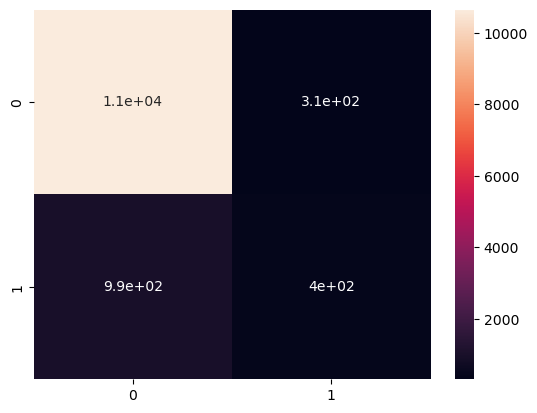

In [192]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
print(classification_report(y_test,y_pred))

### Gradient Boosting

In [306]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)
gb_preds = gb_model.predict(X_test)

In [307]:
print("\n Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, gb_preds))
print(classification_report(y_test, gb_preds))


 Gradient Boosting Results
Accuracy: 0.8854529264146361
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10961
           1       0.49      0.41      0.45      1392

    accuracy                           0.89     12353
   macro avg       0.71      0.68      0.69     12353
weighted avg       0.88      0.89      0.88     12353



# XG-BOOST

In [311]:
from xgboost import XGBClassifier

xgb = XGBClassifier(alpha = 0.1, lambda_= 0.1, max_depth = 3, n_estimators = 50,learning_rate = 0.01)
xgb.fit(X_train,y_train)
y_hat = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10961
           1       0.57      0.29      0.38      1392

    accuracy                           0.90     12353
   macro avg       0.74      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353



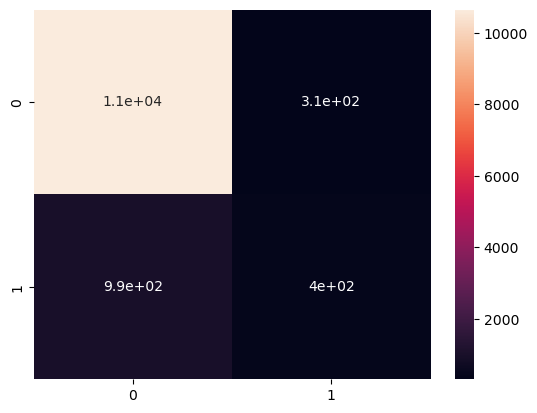

In [313]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
print(classification_report(y_test,y_pred))

### SVC

In [203]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_train_smote, y_train_smote)
svc_preds = svc_model.predict(X_test)

In [204]:
print("\n SVC Results")
print("Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))


 SVC Results
Accuracy: 0.7242775034404598
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     10961
           1       0.25      0.73      0.37      1392

    accuracy                           0.72     12353
   macro avg       0.60      0.73      0.60     12353
weighted avg       0.88      0.72      0.77     12353



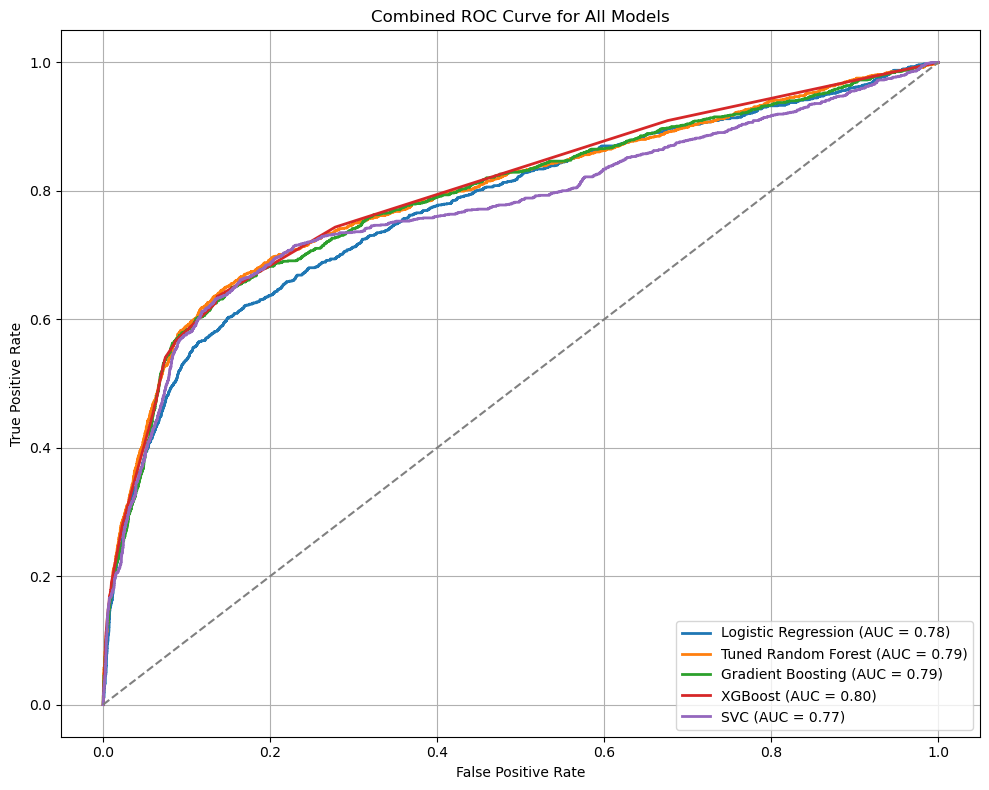

In [261]:
from sklearn.metrics import roc_curve, auc

y_probs_lr = model.predict_proba(X_test)[:, 1]  # Logistic Regression
y_probs_rf2 = rf_clf2.predict_proba(X_test)[:, 1]  # Tuned Random Forest
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]  # Gradient Boosting
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]  # XGBoost
y_probs_svc = svc_model.predict_proba(X_test)[:, 1]  # SVC

# Plot
plt.figure(figsize=(10, 8))

models = [
    ("Logistic Regression", y_probs_lr),
    ("Tuned Random Forest", y_probs_rf2),
    ("Gradient Boosting", y_probs_gb),
    ("XGBoost", y_probs_xgb),
    ("SVC", y_probs_svc)
]

for name, probs in models:
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


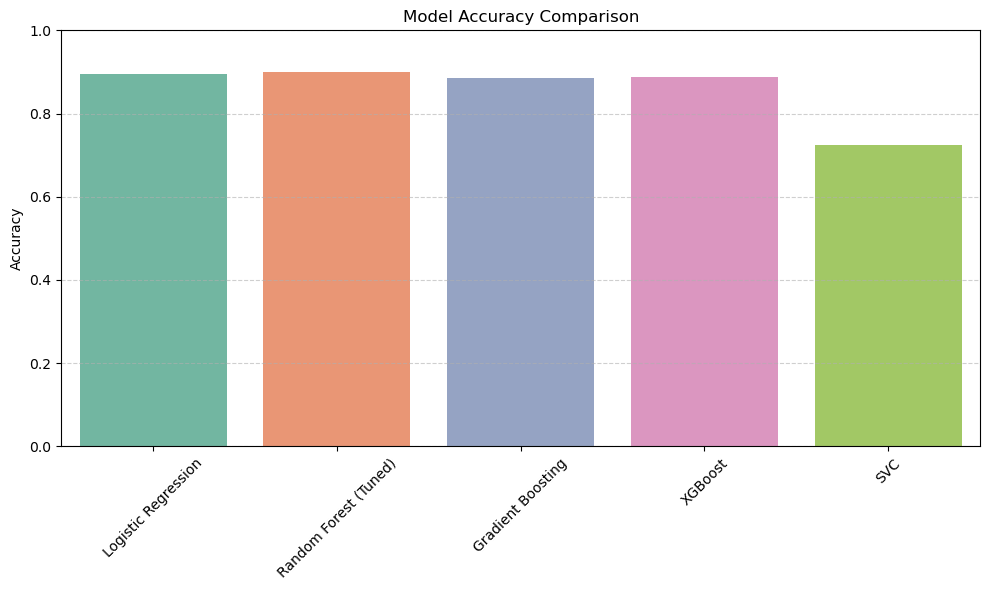

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Make predictions
log_pred = model.predict(X_test)
rf_tuned_pred = rf_clf2.predict(X_test)   # Using tuned Random Forest
gb_pred = gb_model.predict(X_test)
xgb_pred = xgb.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Accuracy Scores
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, log_pred),
    'Random Forest (Tuned)': accuracy_score(y_test, rf_tuned_pred),
    'Gradient Boosting': accuracy_score(y_test, gb_pred),
    'XGBoost': accuracy_score(y_test, xgb_pred),
    'SVC': accuracy_score(y_test, svc_pred)
}

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="Set2")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- ## Among all models, XGBoost and Tuned Random Forest Classifier performed the best across accuracy
- ## The hyperparameter tuning of Random Forest significantly improved its generalization power, outperforming its default version.
- ## Gradient Boosting showed consistent but slightly lower performance than XGBoost.

# TASK 3

- ##  Suggestions :
- ### Focus on clients with 'secondary' or 'tertiary' education,they show higher product interest and Prioritize customers in age group '30–60,' especially working professionals.
- ### 'In timings' - Launch major campaigns in May, July, and August—peak engagement months,schedule contact attempts on Tuesdays and Thursdays for better response

# Challenges Faced

- ### The dataset was heavily imbalanced, with a large majority of customers not subscribing to the term deposit
- ### This imbalance led to misleading model accuracy, as models tended to favor the majority class
- ### To address this, SMOTE was applied to oversample the minority class (yes), which helped improve recall and overall model balance.

- ### Almost all columns in the dataset had business relevance, Dropping any of them risked losing important patterns and signals.
- ### This required careful handling during feature encoding and model selection to avoid overfitting or redundancy.

- ### The pairplots and bivariate barplots revealed intricate relationships between numerical variables and the target.
- ### The dataset had multiple categorical columns with non-ordinal values
- ### Choosing appropriate encoding methods (like one-hot or label encoding) while controlling the dimensionality was a key challenge.
- ### Varying feature scales and presence of outliers needed thoughtful preprocessing 